Here we are creating a Deep Learning Model to identify and classify the Emotions of Dogs by using their Images.

We will be classifying Emotions into 3 categories :
1. Happy
2. Sad
3. Angry

Let us begin...

# Importing the Libraries

In [23]:
import os
import matplotlib.pyplot as plt
import cv2
from keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.backend import epsilon
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout, Dense,BatchNormalization, Flatten, MaxPool2D
import tensorflow as tf
import numpy as np

We have 3 types of images- Angry, Happy and Sad

In [3]:
print(os.listdir("C:\\Users\\Rishabh Mishra\\Documents\\Dog Emotion Classifier\\images"))

['angry', 'happy', 'sad']


In [4]:
# Selecting the Paths for Angry, Sad and happy images

angry= "C:\\Users\\Rishabh Mishra\\Documents\\Dog Emotion Classifier\\images\\angry"
sad = 'C:\\Users\\Rishabh Mishra\\Documents\\Dog Emotion Classifier\\images\\sad'
happy = 'C:\\Users\\Rishabh Mishra\\Documents\\Dog Emotion Classifier\\images\\happy'

angry_path = os.listdir(angry)
sad_path = os.listdir(sad)
happy_path = os.listdir(happy)

In [5]:
# Function for Displaying Images

def load_img(path):
    image = cv2.imread(path)
    image = cv2.resize(image,(224, 224))
    return image[...,::-1]

Sample images for Angry Dogs

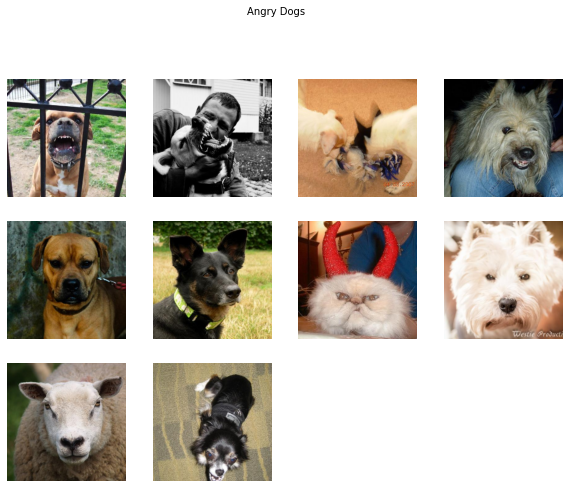

In [6]:
fig = plt.figure(figsize=(10, 10))

for i in range(10):
    plt.subplot(4, 4, i+1)
    plt.imshow(load_img(angry +"//" + angry_path[i]), cmap='gray')
    plt.suptitle("Angry Dogs",fontsize=10)
    plt.axis('off')

plt.show()

Sample images for Sad Dogs

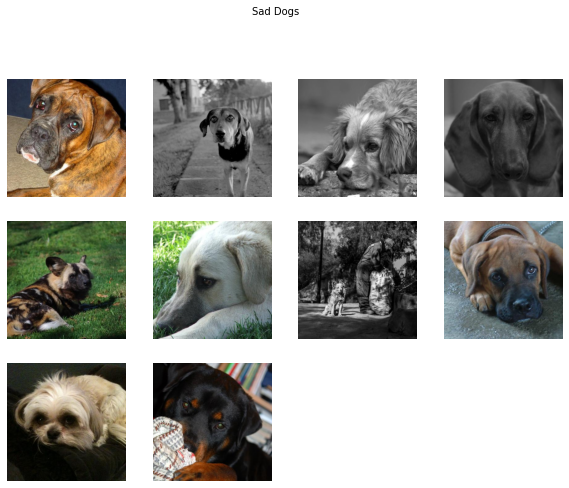

In [7]:
fig = plt.figure(figsize=(10, 10))

for i in range(10):
    plt.subplot(4, 4, i+1)
    plt.imshow(load_img(sad +"//" + sad_path[i]), cmap='gray')
    plt.suptitle("Sad Dogs",fontsize=10)
    plt.axis('off')

plt.show()

Sample images for Happy Dogs

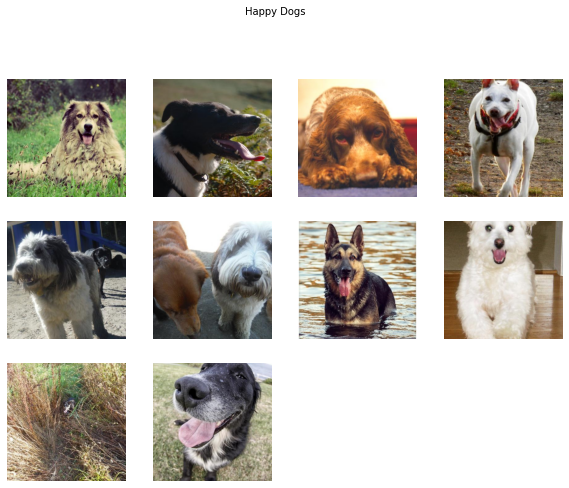

In [8]:
fig = plt.figure(figsize=(10, 10))

for i in range(10):
    plt.subplot(4, 4, i+1)
    plt.imshow(load_img(happy +"//" + happy_path[i]), cmap='gray')
    plt.suptitle("Happy Dogs",fontsize=10)
    plt.axis('off')

plt.show()

# Creating the Models

In [26]:
# Setting path for all the images
dataset_path = "C:\\Users\\Rishabh Mishra\\Documents\\Dog Emotion Classifier\\images"

In [27]:
data_with_aug = ImageDataGenerator(horizontal_flip=True,
                                   vertical_flip=False,
                                   rescale=1./255,
                                  validation_split=0.3)

In [28]:
# Training Data
train = data_with_aug.flow_from_directory(dataset_path,
                                          class_mode="binary",
                                          target_size=(96, 96),
                                          batch_size=32,
                                          subset="training")

Found 8102 images belonging to 3 classes.


In [29]:
# Testing Data
val = data_with_aug.flow_from_directory(dataset_path,
                                          class_mode="binary",
                                          target_size=(96, 96),
                                          batch_size=32,
                                          subset="validation"
                                          )

Found 3470 images belonging to 3 classes.


Using MobileNetV2

In [30]:
mnet = MobileNetV2(include_top = False, weights = "imagenet" ,input_shape=(96,96,3))

In [31]:
model = Sequential([mnet,
                    GlobalAveragePooling2D(),
                    Dense(512, activation = "relu"),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(128, activation = "relu"),
                    Dropout(0.1),
                    # Dense(32, activation = "relu"),
                    # Dropout(0.3),
                    Dense(4, activation = "sigmoid")])

model.layers[0].trainable = False

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics="accuracy")

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_96 (Functi  (None, 3, 3, 1280)       2257984   
 onal)                                                           
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 512)               655872    
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                      

In [32]:
# Training the Model
hist = model.fit_generator(train,
                    epochs=10,
                    callbacks=0,
                    validation_data=val)

Epoch 1/10


C:\Users\Rishabh Mishra\AppData\Local\Temp\ipykernel_1692\2645635142.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train,


254/254 [==============================] - 48s 176ms/step - loss: 1.1308 - accuracy: 0.5462 - val_loss: 0.9649 - val_accuracy: 0.5914
Epoch 2/10
254/254 [==============================] - 47s 183ms/step - loss: 0.8423 - accuracy: 0.6354 - val_loss: 0.9168 - val_accuracy: 0.6058
Epoch 3/10
254/254 [==============================] - 52s 206ms/step - loss: 0.7660 - accuracy: 0.6749 - val_loss: 0.9477 - val_accuracy: 0.5902
Epoch 4/10
254/254 [==============================] - 43s 168ms/step - loss: 0.7017 - accuracy: 0.7113 - val_loss: 0.9471 - val_accuracy: 0.6086
Epoch 5/10
254/254 [==============================] - 42s 167ms/step - loss: 0.6541 - accuracy: 0.7288 - val_loss: 0.9646 - val_accuracy: 0.6086
Epoch 6/10
254/254 [==============================] - 42s 166ms/step - loss: 0.6127 - accuracy: 0.7498 - val_loss: 0.9986 - val_accuracy: 0.5893
Epoch 7/10
254/254 [==============================] - 42s 165ms/step - loss: 0.5727 - accuracy: 0.7664 - val_loss: 1.0178 - val_accuracy: 0.5

VGG16

In [15]:
train = data_with_aug.flow_from_directory(dataset_path,
                                          class_mode="binary",
                                          target_size=(224, 224),
                                          batch_size=32,
                                          subset="training")

val = data_with_aug.flow_from_directory(dataset_path,
                                          class_mode="binary",
                                          target_size=(224, 224),
                                          batch_size=32,
                                          subset="validation"
                                          )

Found 8102 images belonging to 3 classes.
Found 3470 images belonging to 3 classes.


In [16]:
vgg16_model = tf.keras.applications.vgg16.VGG16(include_top=False, weights="imagenet", input_shape=(224,224,3))

In [17]:
vgg16_model.output[-1]

<KerasTensor: shape=(7, 7, 512) dtype=float32 (created by layer 'tf.__operators__.getitem')>

In [18]:
model = Sequential([vgg16_model,
                    Flatten(),

                    Dense(4, activation = "softmax")])

model.layers[0].trainable = False

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics="accuracy")

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 4)                 100356    
                                                                 
Total params: 14,815,044
Trainable params: 100,356
Non-trainable params: 14,714,688
_________________________________________________________________


In [19]:
# Training the Model
hist =  model.fit_generator(train,
                    epochs=10,
                    callbacks=0,
                    validation_data=val)

Epoch 1/10


C:\Users\Rishabh Mishra\AppData\Local\Temp\ipykernel_1692\343929445.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist =  model.fit_generator(train,


254/254 [==============================] - 1155s 5s/step - loss: 1.0920 - accuracy: 0.5446 - val_loss: 1.0428 - val_accuracy: 0.5824
Epoch 2/10
254/254 [==============================] - 1102s 4s/step - loss: 0.9332 - accuracy: 0.6194 - val_loss: 1.0571 - val_accuracy: 0.5689
Epoch 3/10
254/254 [==============================] - 1096s 4s/step - loss: 0.8349 - accuracy: 0.6671 - val_loss: 1.0868 - val_accuracy: 0.5651
Epoch 4/10
254/254 [==============================] - 1091s 4s/step - loss: 0.7671 - accuracy: 0.6950 - val_loss: 1.6400 - val_accuracy: 0.4303
Epoch 5/10
254/254 [==============================] - 1092s 4s/step - loss: 0.6663 - accuracy: 0.7312 - val_loss: 1.3026 - val_accuracy: 0.5939
Epoch 6/10
254/254 [==============================] - 1092s 4s/step - loss: 0.6200 - accuracy: 0.7473 - val_loss: 1.1998 - val_accuracy: 0.5712
Epoch 7/10
254/254 [==============================] - 1094s 4s/step - loss: 0.5658 - accuracy: 0.7747 - val_loss: 1.2493 - val_accuracy: 0.5285
Epo

In [21]:
# Creating an Array of Images for Prediction
predictions = model.predict_generator(val)

C:\Users\Rishabh Mishra\AppData\Local\Temp\ipykernel_1692\902042886.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(val)


Now we will use the Model to make labelled predictions.

The labels work as follows :

pred=0 -> Dog is Angry

pred=1 -> Dog is Sad

pred=2 -> Dog is Happy

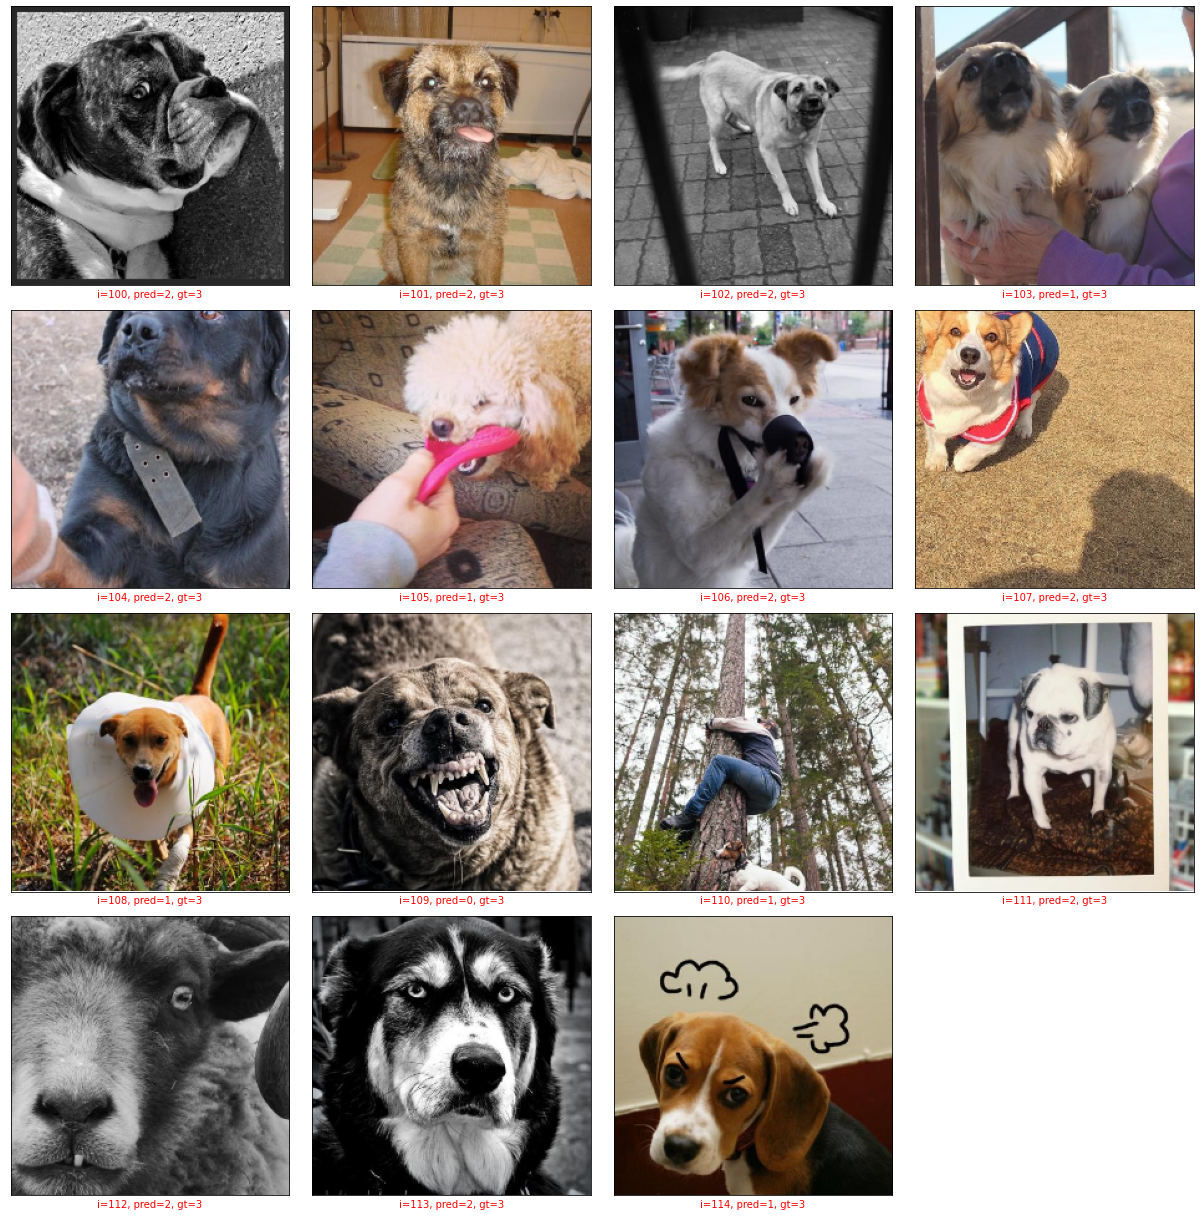

In [34]:
val_path = "C:\\Users\\Rishabh Mishra\\Documents\\Dog Emotion Classifier\\images"

plt.figure(figsize=(17,17))

start_index = 100

for i in range(15):
  plt.subplot(4,4, i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  preds = np.argmax(predictions[[start_index+i]])
    
  gt = val.filenames[start_index+i][9:13]

  
  if gt == 'angry':
    gt = 0
  elif gt == 'sad':
    gt = 1
  elif gt == 'happy':
    gt = 2
  else:
    gt = 3
    
  if preds != gt:
    col ="r"
  else:
    col = "g"

  plt.xlabel('i={}, pred={}, gt={}'.format(start_index+i,preds,gt),color=col)
  plt.imshow(load_img(val_path+"\\"+val.filenames[start_index+i]))
  plt.tight_layout()

plt.show()